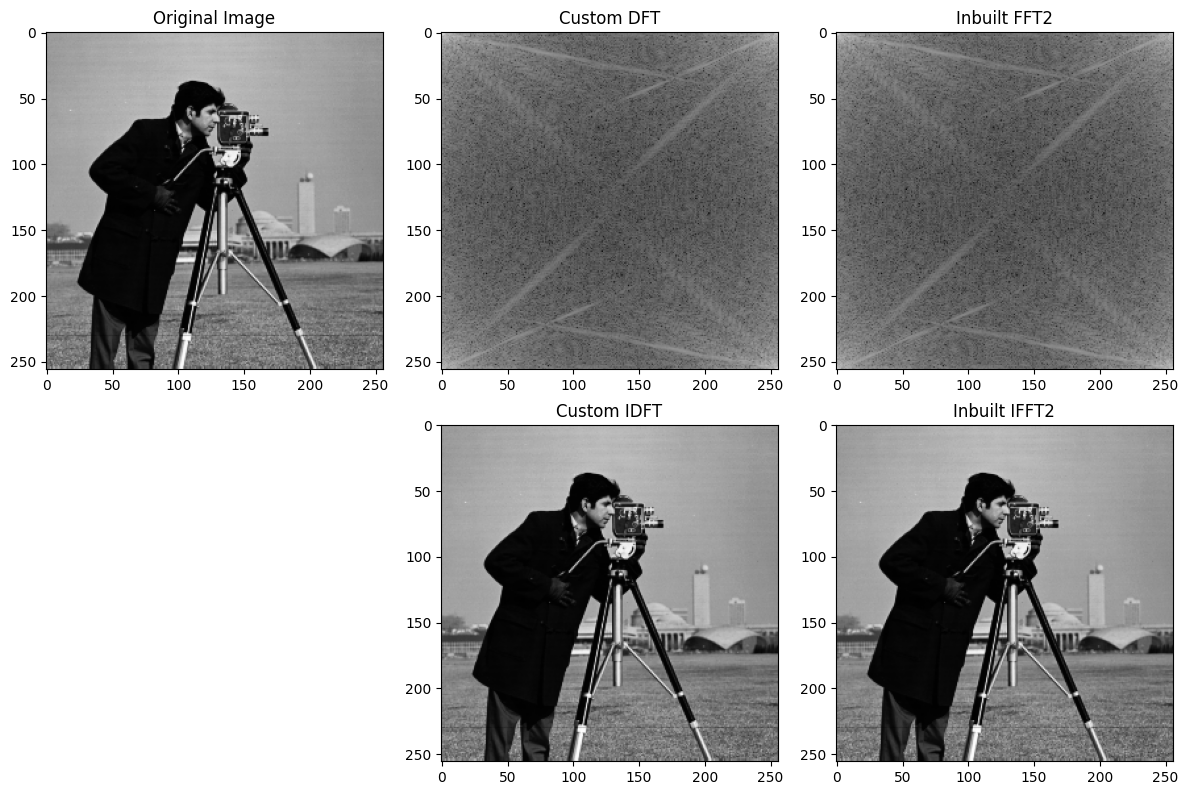

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

def dft1d(signal):
    N = len(signal)
    result = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            result[k] += signal[n] * np.exp(-2j * np.pi * k * n / N)
    return result

def idft1d(freq):
    N = len(freq)
    result = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            result[n] += freq[k] * np.exp(2j * np.pi * k * n / N)
    return result / N

def dft2(img):
    rows, cols = img.shape
    temp = np.zeros((rows, cols), dtype=complex)
    
    # Apply 1D DFT on rows
    for i in range(rows):
        temp[i, :] = dft1d(img[i, :])
    
    # Apply 1D DFT on columns
    result = np.zeros((rows, cols), dtype=complex)
    for j in range(cols):
        result[:, j] = dft1d(temp[:, j])
    
    return result

def idft2(freq):
    rows, cols = freq.shape
    temp = np.zeros((rows, cols), dtype=complex)
    
    # Apply 1D IDFT on columns
    for j in range(cols):
        temp[:, j] = idft1d(freq[:, j])
    
    # Apply 1D IDFT on rows
    result = np.zeros((rows, cols), dtype=complex)
    for i in range(rows):
        result[i, :] = idft1d(temp[i, :])
    
    return result

img = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found. Ensure 'cameraman.tif' is in the directory.")

dft_custom = dft2(img)
idft_custom = idft2(dft_custom).real

dft_builtin = np.fft.fft2(img)
idft_builtin = np.fft.ifft2(dft_builtin).real

# Create output folder
output_dir = "./"
os.makedirs(output_dir, exist_ok=True)

# Plot and Save Results
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(np.log1p(np.abs(dft_custom)), cmap='gray')
plt.title('Custom DFT')

plt.subplot(2, 3, 3)
plt.imshow(np.log1p(np.abs(dft_builtin)), cmap='gray')
plt.title('Inbuilt FFT2')

plt.subplot(2, 3, 5)
plt.imshow(idft_custom, cmap='gray')
plt.title('Custom IDFT')

plt.subplot(2, 3, 6)
plt.imshow(idft_builtin, cmap='gray')
plt.title('Inbuilt IFFT2')

plt.tight_layout()
plt.savefig(os.path.join(output_dir, "dft_comparison.png"))
plt.show()
